In [1]:
import os
import sys

import seaborn as sns
import numpy as np
import matplotlib
matplotlib.use('qt5agg')
import matplotlib.pyplot as plt
import torch
import pandas as pd
sns.set(style='whitegrid', rc={
    'figure.figsize':(12,8),
    'legend.fontsize': 'large',
    'legend.title_fontsize': 'large',
    'axes.labelsize': 'large',
    'axes.titlesize':'large',
    'xtick.labelsize':'large',
    'ytick.labelsize':'large',
    'font.family': 'sans-serif',
    'font.sans-serif': 'Lucida Grande'
})

from simulated_utils import compare
from simulated_utils import BanditEnv

In [2]:
%matplotlib inline

In [26]:
 def plot_results(data):
    fig, axes = plt.subplots(1, 3, figsize=(21, 6))
    #sns.lineplot(data=data, x='iter', y='mean_reward', hue='method', ax=axes[0][0], n_boot=1000)
    sns.lineplot(data=data, x='iter', y='pd_param_0_mean', hue='method', ax=axes[0], n_boot=1000)
    sns.lineplot(data=data, x='iter', y='pd_param_1_mean', hue='method', ax=axes[1], n_boot=1000)
    sns.lineplot(data=data, x='iter', y='pd_param_2_mean', hue='method', ax=axes[2], n_boot=1000)
    #axes[0][0].set_ylabel('Mean Reward')
    axes[0].set_ylabel('Probability of Action 0')
    axes[1].set_ylabel('Probability of Action 1')
    axes[2].set_ylabel('Probability of Action 2')

    handles, labels = axes.flatten()[0].get_legend_handles_labels()
    for ax in axes.flatten():
        ax.get_legend().remove()
    fig.legend(handles[1:], labels[1:], loc='upper center', title='Method', ncol=4)
    plt.show()
    
    sns.lineplot(data=data, x='iter', y='mean_reward', hue='method', n_boot=1000)
    plt.ylim([0, 1])
    plt.show()

In [4]:
 def learned_histograms(data):
    fig, axes = plt.subplots(1, 2, figsize=(16, 6), sharex=True)
    for m in np.unique(saved_data.method):
        axes[0].hist(filter_df(saved_data, iter=39, method=m)['pd_param_0_mean'], label=m, alpha=0.4)
    plt.legend()

    for m in np.unique(saved_data.method):
        axes[1].hist(filter_df(saved_data, iter=39, method=m)['pd_param_1_mean'], label=m, alpha=0.4)
    plt.legend()
    plt.show()

In [5]:
def filter_df(df, **kwargs):
    for k,v in kwargs.items():
        df = df[df[k] == v]
    return df

/Users/cusgadmion/Documents/ppo-mw/code/analysis/simulated_utils.py:188: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return torch.nn.functional.softmax(self.logits).repeat(


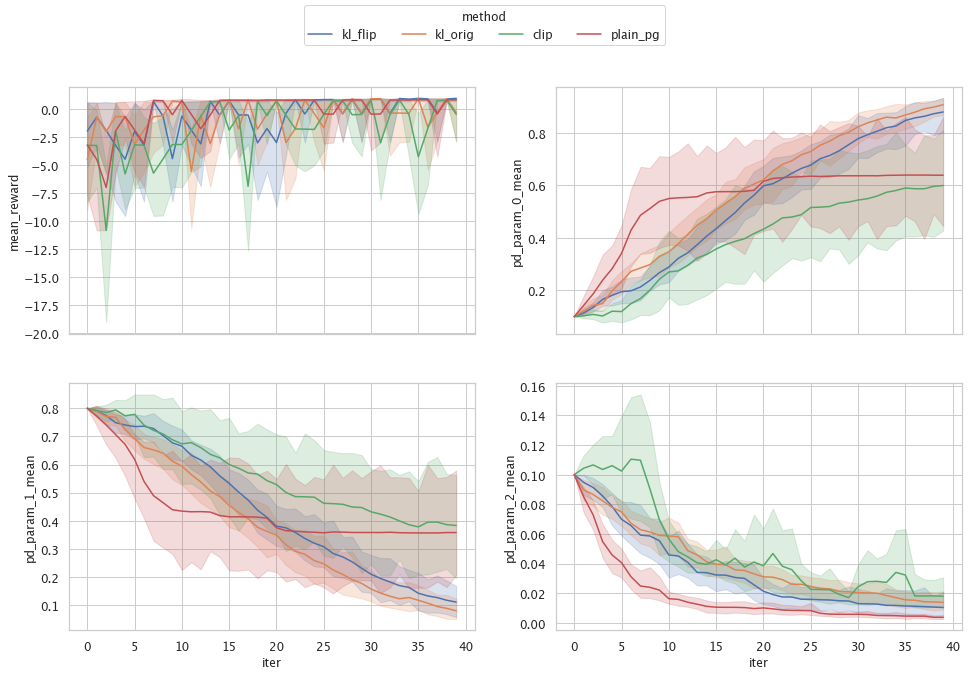

In [6]:
env = BanditEnv(avg_rewards=[1., 0.5, -50.])
data = compare(env, 'discrete', policy_init=np.log([0.1, 0.8, 0.1]), n_steps=40, repeats=20,
               lr=1e-2, batch_size=2, num_minibatches=1, ppo_epochs=50)
plot_results(data)

/Users/cusgadmion/Documents/ppo-mw/code/analysis/simulated_utils.py:188: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return torch.nn.functional.softmax(self.logits).repeat(


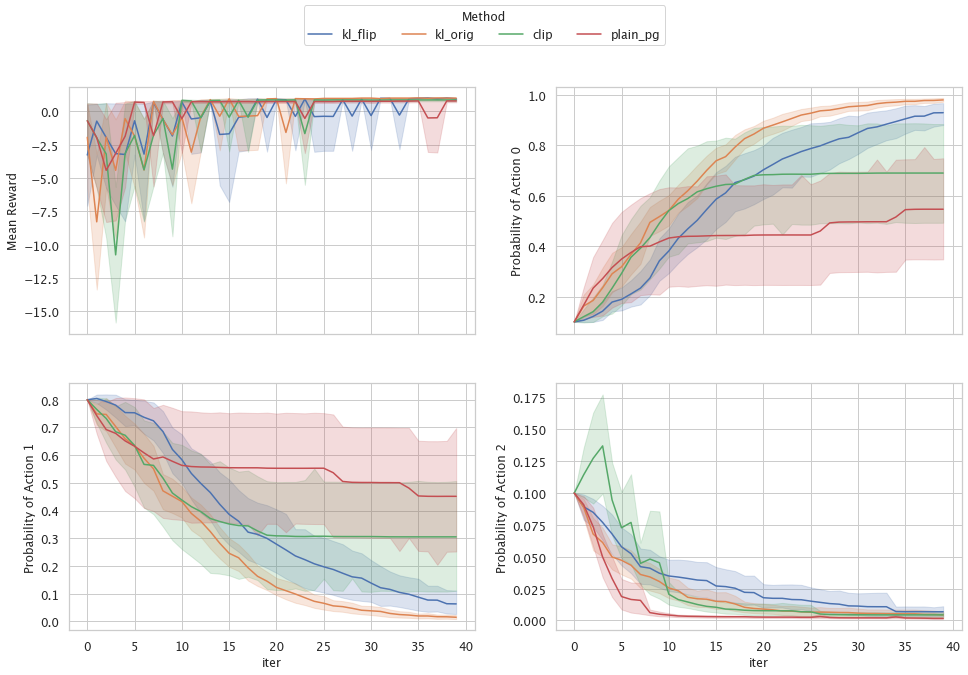

In [12]:
env = BanditEnv(avg_rewards=[1., 0.5, -50.])
data = compare(env, 'discrete', policy_init=np.log([0.1, 0.8, 0.1]), n_steps=40, repeats=20,
               lr=1e-1, batch_size=2, num_minibatches=1, ppo_epochs=10)
plot_results(data)

/Users/cusgadmion/Documents/ppo-mw/code/analysis/simulated_utils.py:188: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return torch.nn.functional.softmax(self.logits).repeat(


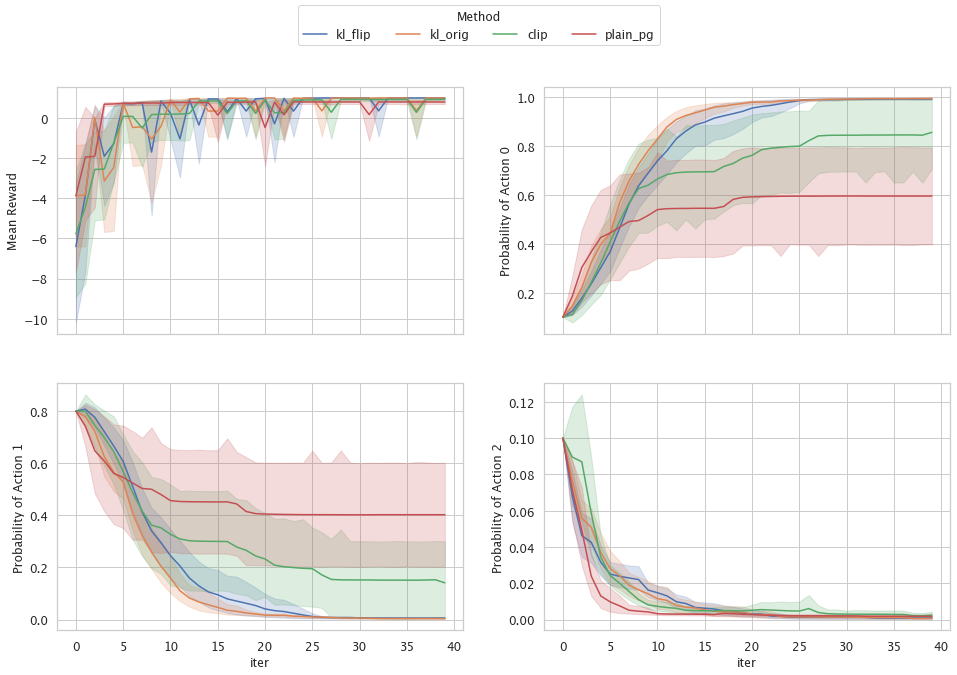

In [13]:
env = BanditEnv(avg_rewards=[1., 0.5, -50.])
data = compare(env, 'discrete', policy_init=np.log([0.1, 0.8, 0.1]), n_steps=40, repeats=20,
               lr=1e-1, batch_size=4, num_minibatches=1, ppo_epochs=10)
plot_results(data)

/Users/cusgadmion/Documents/ppo-mw/code/analysis/simulated_utils.py:188: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return torch.nn.functional.softmax(self.logits).repeat(


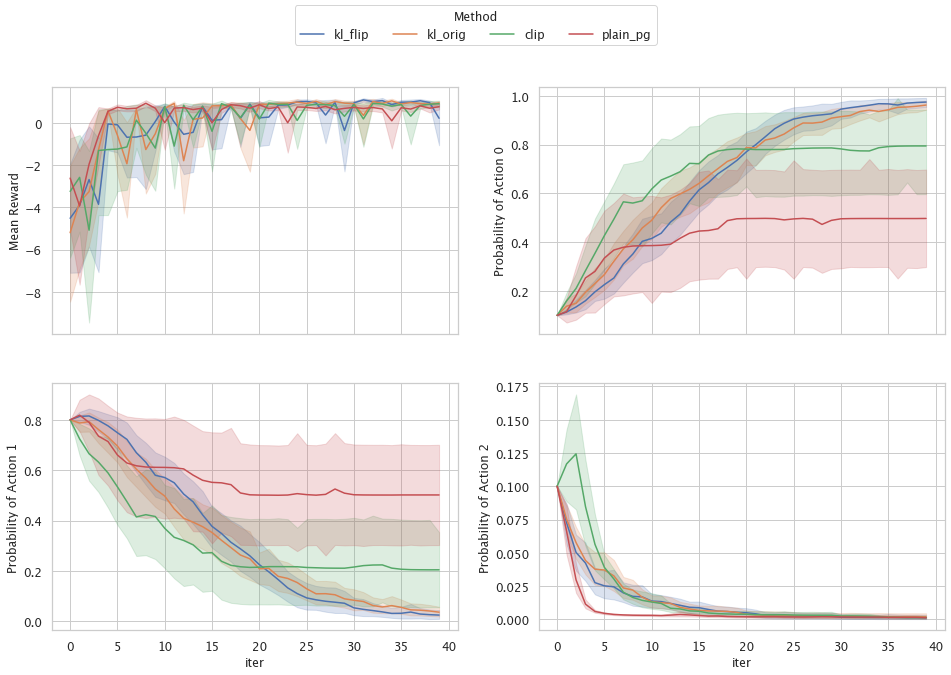

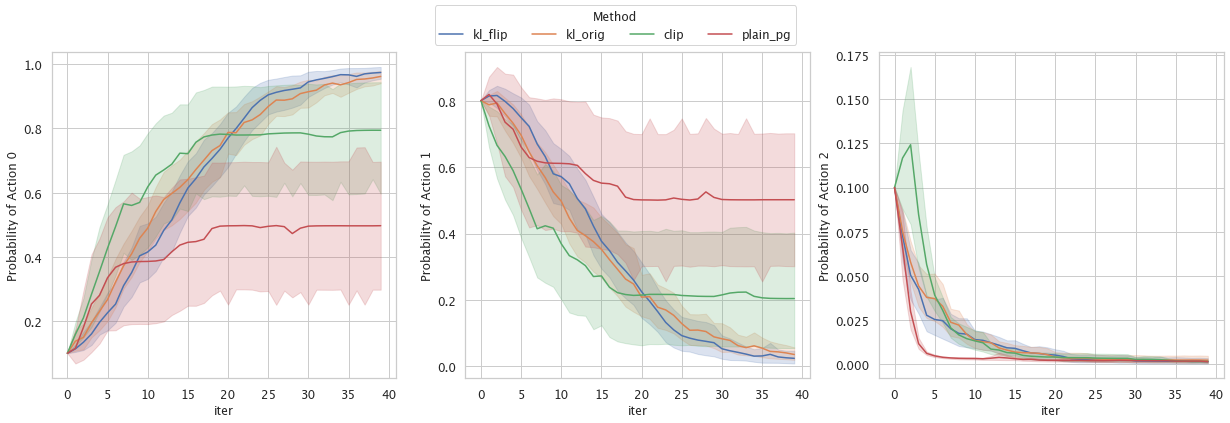

In [20]:
env = BanditEnv(avg_rewards=[1., 0.5, -50.], noise_std=0.5)
data = compare(env, 'discrete', policy_init=np.log([0.1, 0.8, 0.1]), n_steps=40, repeats=20,
               lr=1e-1, batch_size=4, num_minibatches=1, ppo_epochs=10)
plot_results(data)
plot_results(data)

/Users/cusgadmion/Documents/ppo-mw/code/analysis/simulated_utils.py:188: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return torch.nn.functional.softmax(self.logits).repeat(


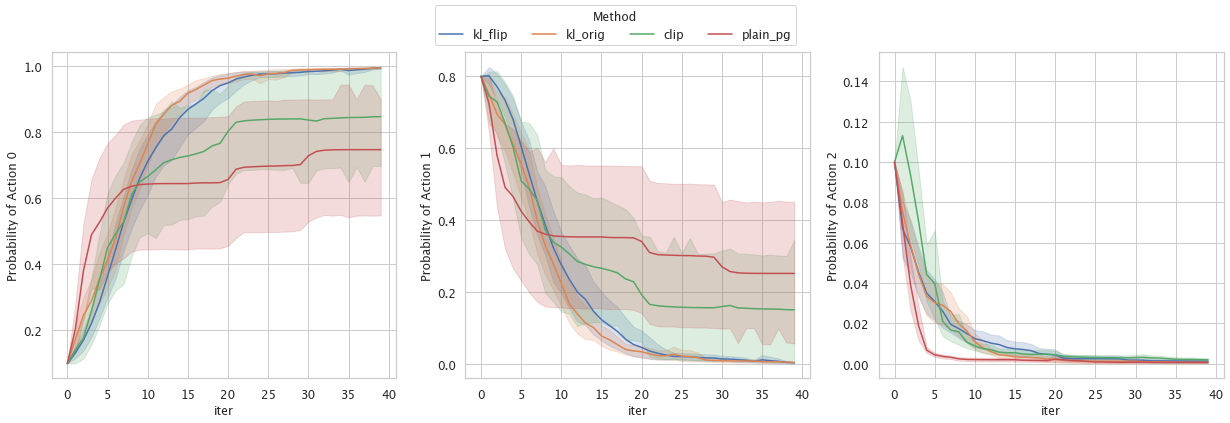

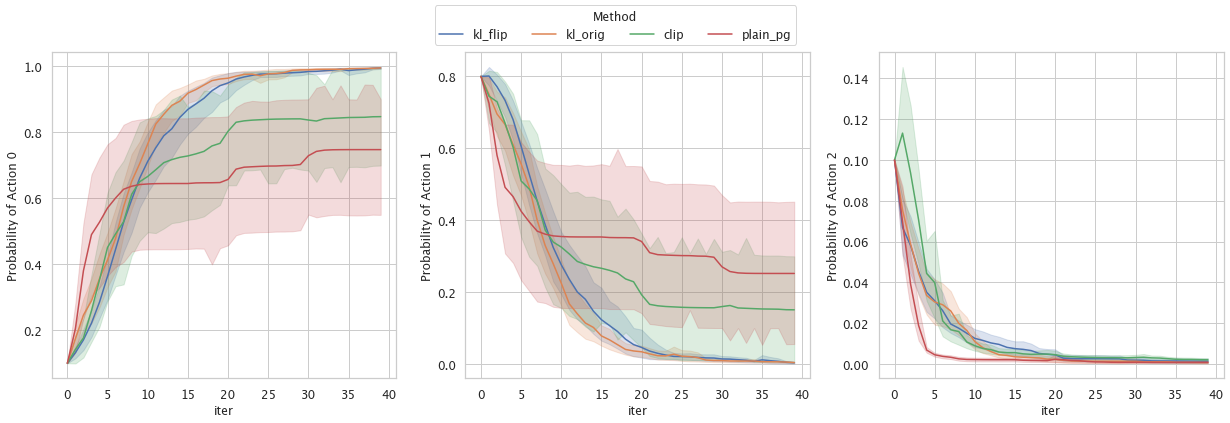

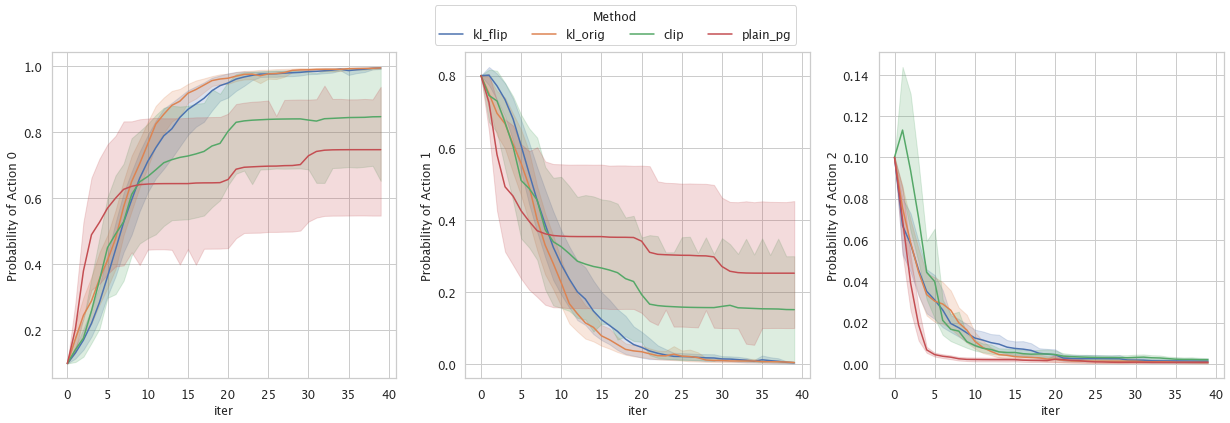

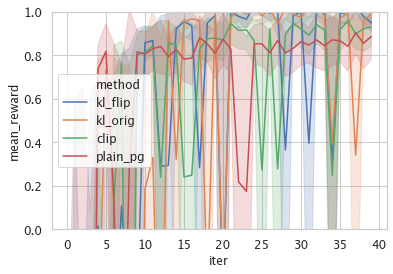

In [27]:
env = BanditEnv(avg_rewards=[1., 0.5, -50.], noise_std=0.2)
data = compare(env, 'discrete', policy_init=np.log([0.1, 0.8, 0.1]), n_steps=40, repeats=20,
               lr=1e-1, batch_size=4, num_minibatches=1, ppo_epochs=10)
plot_results(data)

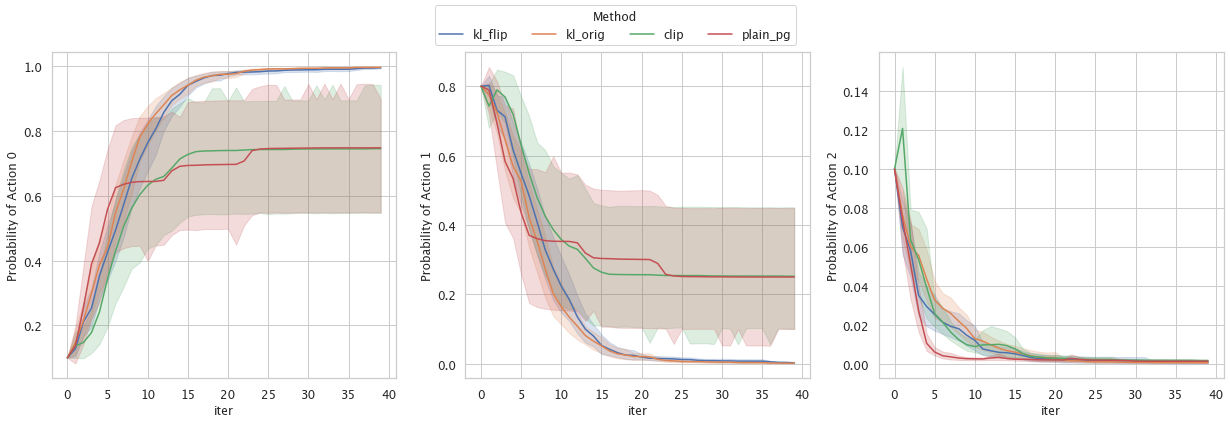

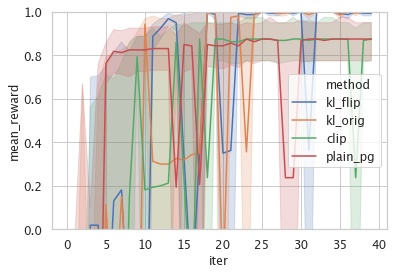

In [30]:
env = BanditEnv(avg_rewards=[1., 0.5, -50.], noise_std=0.001)
data_noise_zero = compare(env, 'discrete', policy_init=np.log([0.1, 0.8, 0.1]), n_steps=40, repeats=20,
               lr=1e-1, batch_size=4, num_minibatches=1, ppo_epochs=10)
plot_results(data_noise_zero)

/Users/cusgadmion/Documents/ppo-mw/code/analysis/simulated_utils.py:188: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return torch.nn.functional.softmax(self.logits).repeat(


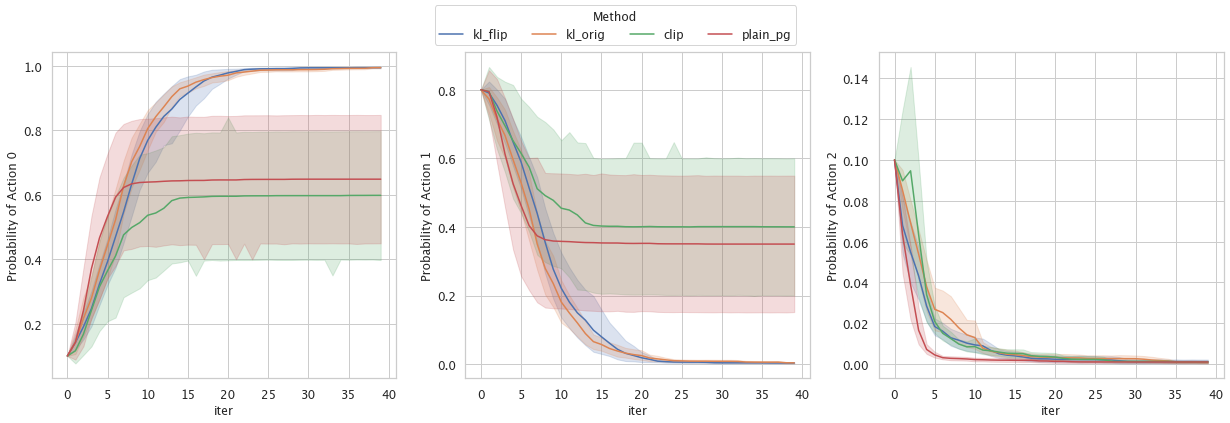

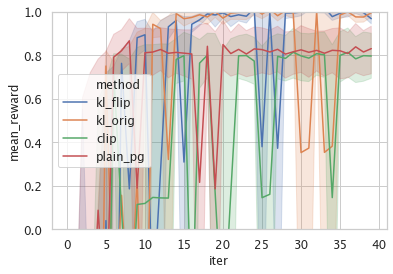

In [28]:
env = BanditEnv(avg_rewards=[1., 0.5, -50.], noise_std=0.1)
data_noise_p1 = compare(env, 'discrete', policy_init=np.log([0.1, 0.8, 0.1]), n_steps=40, repeats=20,
               lr=1e-1, batch_size=4, num_minibatches=1, ppo_epochs=10)
plot_results(data_noise_p1)

/Users/cusgadmion/Documents/ppo-mw/code/analysis/simulated_utils.py:188: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return torch.nn.functional.softmax(self.logits).repeat(


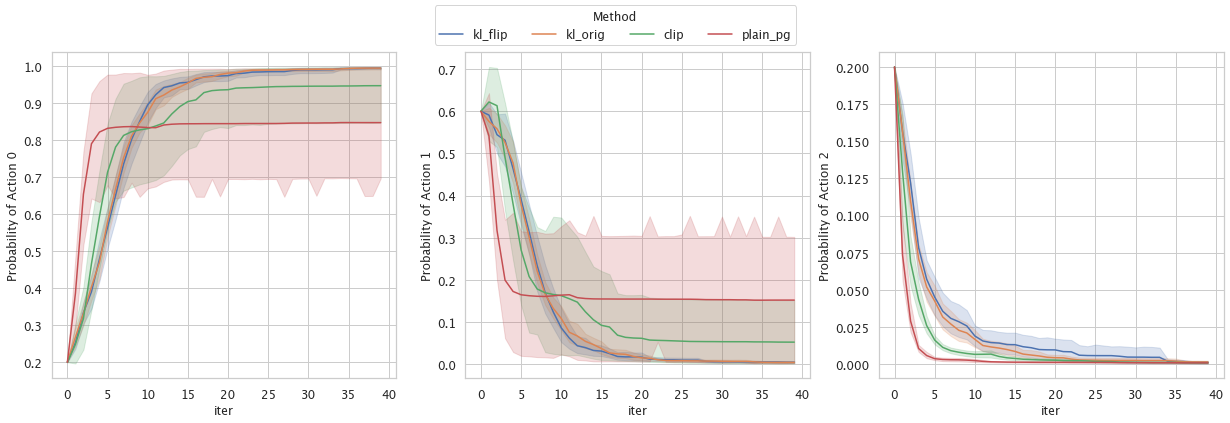

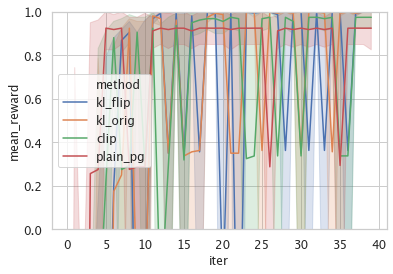

In [33]:
env = BanditEnv(avg_rewards=[1., 0.5, -50.], noise_std=0.001)
data = compare(env, 'discrete', policy_init=np.log([0.2, 0.6, 0.2]), n_steps=40, repeats=20,
               lr=1e-1, batch_size=4, num_minibatches=1, ppo_epochs=10)
plot_results(data)

/Users/cusgadmion/Documents/ppo-mw/code/analysis/simulated_utils.py:188: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return torch.nn.functional.softmax(self.logits).repeat(


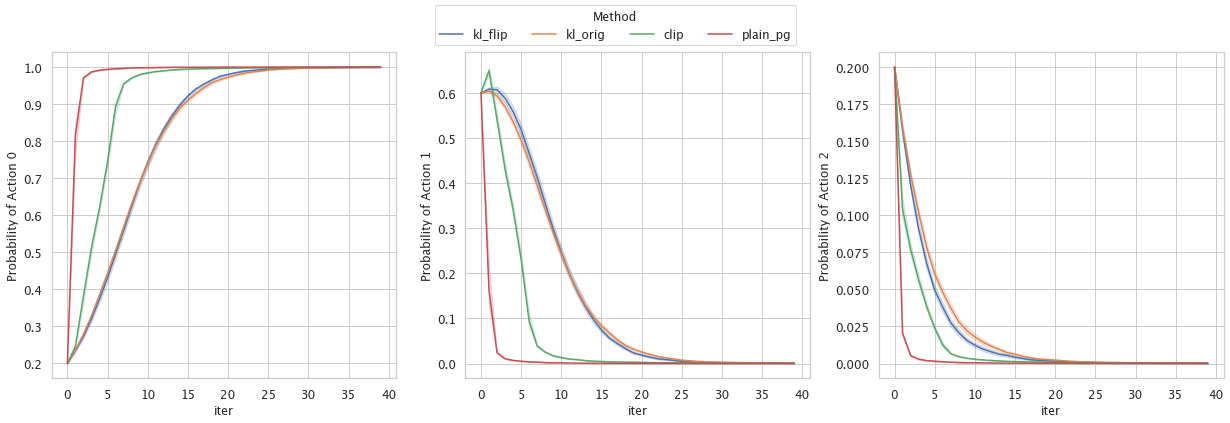

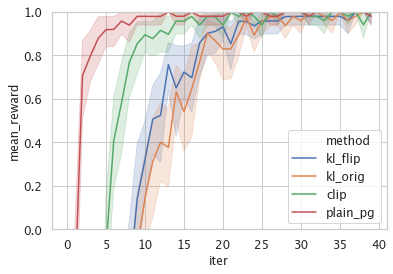

In [36]:
env = BanditEnv(avg_rewards=[1., 0.5, -50.], noise_std=0.001)
data = compare(env, 'discrete', policy_init=np.log([0.2, 0.6, 0.2]), n_steps=40, repeats=20,
               lr=1e-2, batch_size=128, num_minibatches=32, ppo_epochs=10)
plot_results(data)

/Users/cusgadmion/Documents/ppo-mw/code/analysis/simulated_utils.py:188: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return torch.nn.functional.softmax(self.logits).repeat(


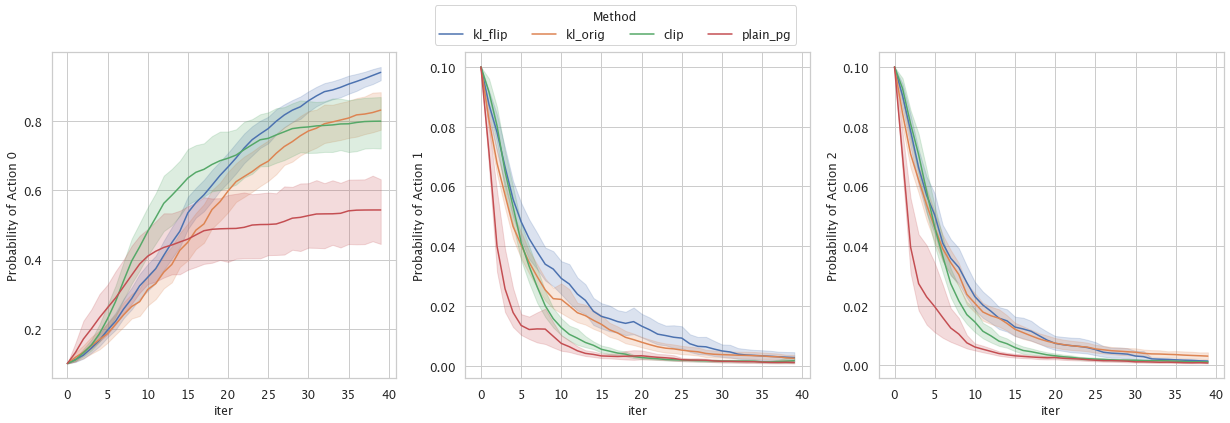

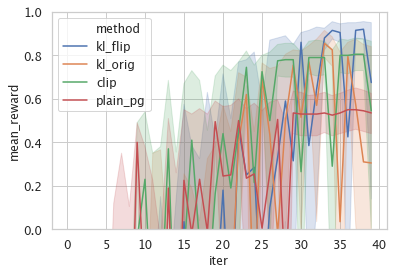

In [40]:
env = BanditEnv(avg_rewards=[1., -50., -50., 0., 0., 0., 0., 0., 0., 0.], noise_std=0.001)
data_noise_p1 = compare(env, 'discrete', n_steps=40, repeats=100,
               lr=1e-1, batch_size=2, num_minibatches=1, ppo_epochs=10)
plot_results(data_noise_p1)

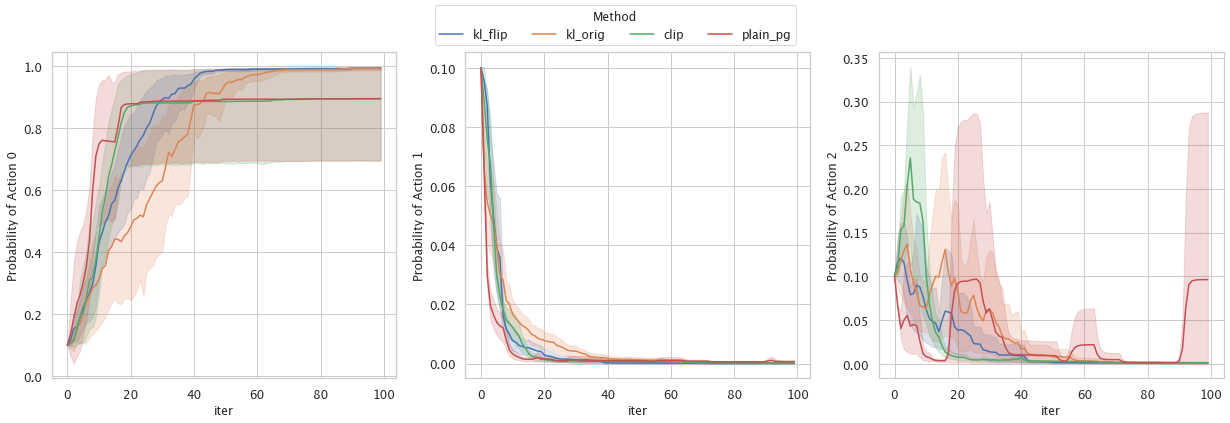

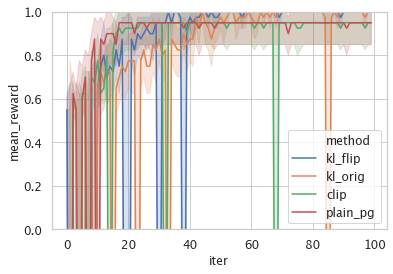

In [47]:
env = BanditEnv(avg_rewards=[1., -50., 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5], noise_std=0.001)
data = compare(env, 'discrete', n_steps=100, repeats=10,
               lr=1e-1, batch_size=2, num_minibatches=1, ppo_epochs=10)
plot_results(data)

In [103]:
rewards = np.concatenate([-np.ones(19), np.ones(18), np.zeros(1)])
rewards = (rewards - np.mean(rewards)) / np.std(rewards)
rewards

array([-0.98710548, -0.98710548, -0.98710548, -0.98710548, -0.98710548,
       -0.98710548, -0.98710548, -0.98710548, -0.98710548, -0.98710548,
       -0.98710548, -0.98710548, -0.98710548, -0.98710548, -0.98710548,
       -0.98710548, -0.98710548, -0.98710548, -0.98710548,  1.04046253,
        1.04046253,  1.04046253,  1.04046253,  1.04046253,  1.04046253,
        1.04046253,  1.04046253,  1.04046253,  1.04046253,  1.04046253,
        1.04046253,  1.04046253,  1.04046253,  1.04046253,  1.04046253,
        1.04046253,  1.04046253,  0.02667853])

In [97]:
env = BanditEnv(avg_rewards=[1., 0.8, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5], noise_std=0.001)
data = compare(env, 'discrete', n_steps=100, repeats=10,
               lr=1e-1, batch_size=2, num_minibatches=1, ppo_epochs=10)
plot_results(data)

array([-0.5, -0.5, -0.5, -0.5,  2. ])